Step-1:Problem statement and data collection

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data from csv file
df=pd.read_csv("Auto Sales data.csv")

In [4]:
#Display first five rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


Step:2-Exploration and data cleaning

In [44]:
# Obtain information about data types and non-null values
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
CITY                            object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
# Obtain dimensions
df.shape

(2747, 20)

In [8]:
#Eliminate duplicates
df.drop_duplicates(inplace=True)

Step 3: Analysis of univariate variables

In [9]:
#1-Find the number of products in each category of productline.
df['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64

In [10]:
df['COUNTRY'].value_counts()

COUNTRY
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: count, dtype: int64

In [11]:
df['PRODUCTCODE'].value_counts()

PRODUCTCODE
S18_3232    51
S32_2509    28
S50_1392    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: count, Length: 109, dtype: int64

In [12]:
df['DEALSIZE'].value_counts()

DEALSIZE
Medium    1349
Small     1246
Large      152
Name: count, dtype: int64

In [14]:
df['STATUS'].value_counts()

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [15]:
df['SALES'].value_counts()

SALES
2559.60    2
1729.00    2
1463.00    2
3789.72    2
3184.80    2
          ..
2804.36    1
4900.80    1
2759.31    1
2488.20    1
2116.16    1
Name: count, Length: 2690, dtype: int64

In [17]:
numerical_data = df[['QUANTITYORDERED','PRICEEACH','SALES','DAYS_SINCE_LASTORDER','MSRP']]

In [18]:
#Find correlation between numerical coulmns
numerical_data.corr()

,QUANTITYORDERED,PRICEEACH,SALES,DAYS_SINCE_LASTORDER,MSRP
QUANTITYORDERED,1.000000,0.010161,0.553359,-0.021923,0.020551
PRICEEACH,0.010161,1.000000,0.808287,-0.397091,0.778393
SALES,0.553359,0.808287,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.021923,-0.397091,-0.334274,1.000000,-0.524285
MSRP,0.020551,0.778393,0.634849,-0.524285,1.000000


<Axes: xlabel='STATUS', ylabel='count'>

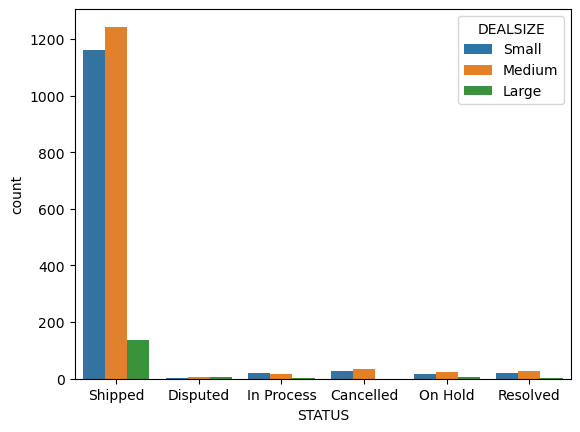

In [58]:
sns.countplot(x='STATUS', hue='DEALSIZE', data=df)

<Axes: xlabel='PRODUCTLINE', ylabel='count'>

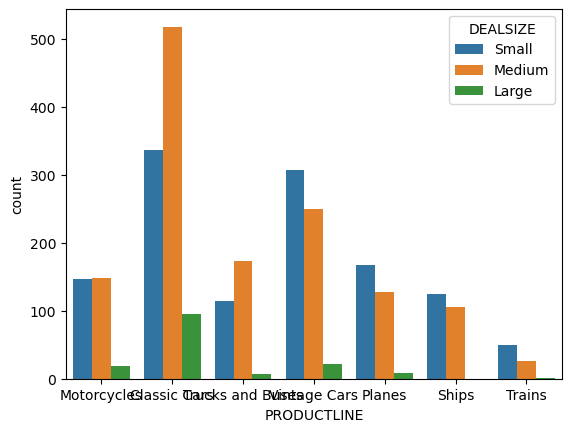

In [21]:
sns.countplot(x='PRODUCTLINE', hue='DEALSIZE', data=df)

<BarContainer object of 2747 artists>

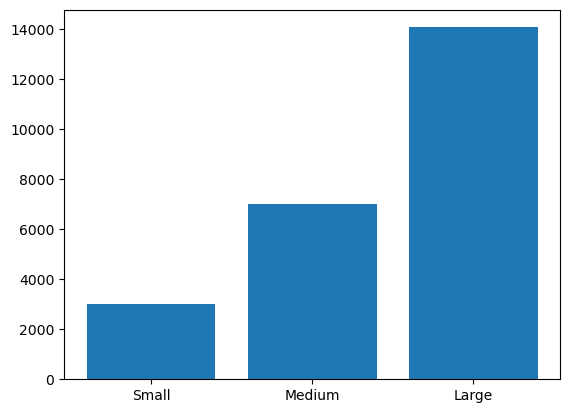

In [26]:
import matplotlib.pyplot as plt
plt.bar(df['DEALSIZE'],df['SALES'])

<BarContainer object of 2747 artists>

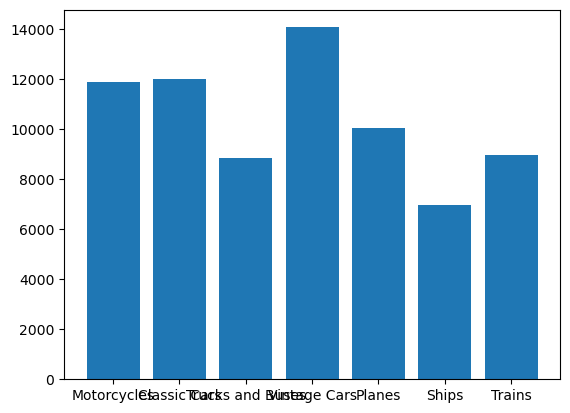

In [27]:

plt.bar(df['PRODUCTLINE'],df['SALES'])

In [23]:
# changing dtype of order_date column to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], dayfirst=True, errors='coerce')

In [25]:
df.DAYS_SINCE_LASTORDER.nunique()

1832

In [28]:
df.CUSTOMERNAME.nunique()

89

In [31]:
df['CUSTOMERNAME'] = df['CUSTOMERNAME'].str.strip()

In [32]:
#Drop Unnecessary Columns
df = df.drop(columns=['PHONE', 'ADDRESSLINE1', 'POSTALCODE'])

In [33]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [34]:
df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1880,10420,26,100.66,12,2617.16,2020-05-29,1883,In Process,Classic Cars,107,S24_3432,Souveniers And Things Co.,Chatswood,Australia,Huxley,Adrian,Small
717,10356,29,125.18,3,3630.22,2019-12-09,892,Shipped,Vintage Cars,127,S18_2325,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium
1386,10420,60,64.67,11,3880.20,2020-05-29,1389,In Process,Classic Cars,73,S24_1046,Souveniers And Things Co.,Chatswood,Australia,Huxley,Adrian,Medium
1803,10368,46,79.62,1,3662.52,2020-01-19,1937,Shipped,Classic Cars,85,S24_3191,Mini Gifts Distributors Ltd.,San Rafael,USA,Nelson,Valarie,Medium
1381,10332,23,56.84,4,1307.32,2019-11-17,1578,Shipped,Classic Cars,73,S24_1046,"AV Stores, Co.",Manchester,UK,Ashworth,Victoria,Small


In [35]:
##NaN Values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
CITY                    0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

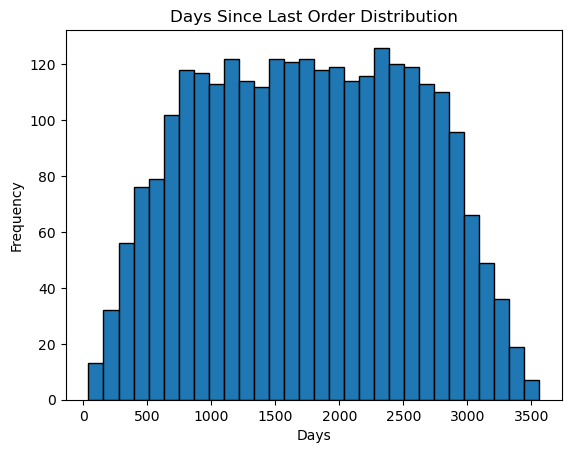

In [43]:
# Creating histogram graph
plt.hist(df['DAYS_SINCE_LASTORDER'], bins=30, edgecolor='black')

# Adding title and label names
plt.title('Days Since Last Order Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Showing the graph
plt.show()

In [45]:
#Find Mean
df["SALES"].mean()

3553.0475828176195

In [46]:
#Find Median
df["SALES"].median()

3184.8

In [47]:
#Find Mode
df["SALES"].mode()[0]

1030.44

<Axes: xlabel='SALES'>

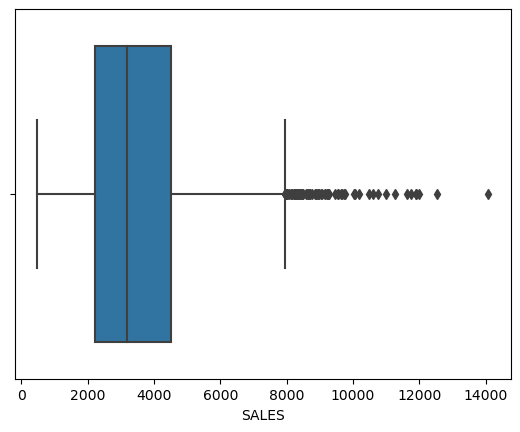

In [48]:
#Boxplot representation
sns.boxplot(data=df,x="SALES")

<Axes: >

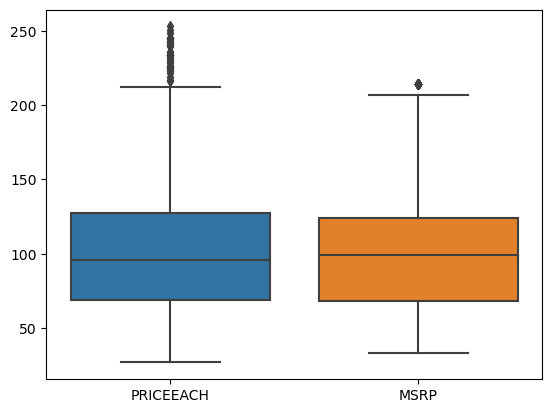

In [49]:
sns.boxplot(df[['PRICEEACH','MSRP']])

Step 4: Analysis of multivariate variables

<Axes: xlabel='MSRP', ylabel='PRICEEACH'>

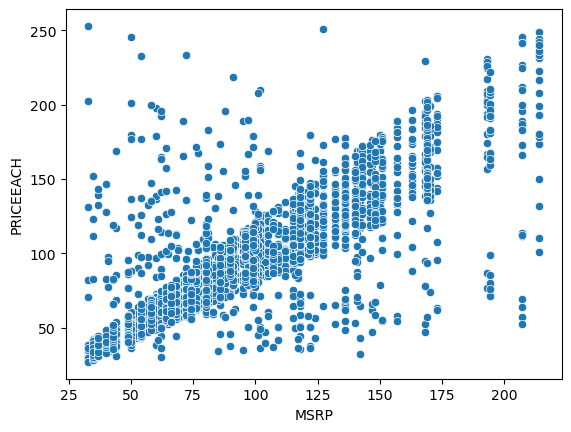

In [55]:
#scatteplot between Age and PassengerId
sns.scatterplot(data=df,x="MSRP",y="PRICEEACH")

In [56]:
#Correlation
df[['MSRP','PRICEEACH']].corr()

,MSRP,PRICEEACH
MSRP,1.000000,0.778393
PRICEEACH,0.778393,1.000000


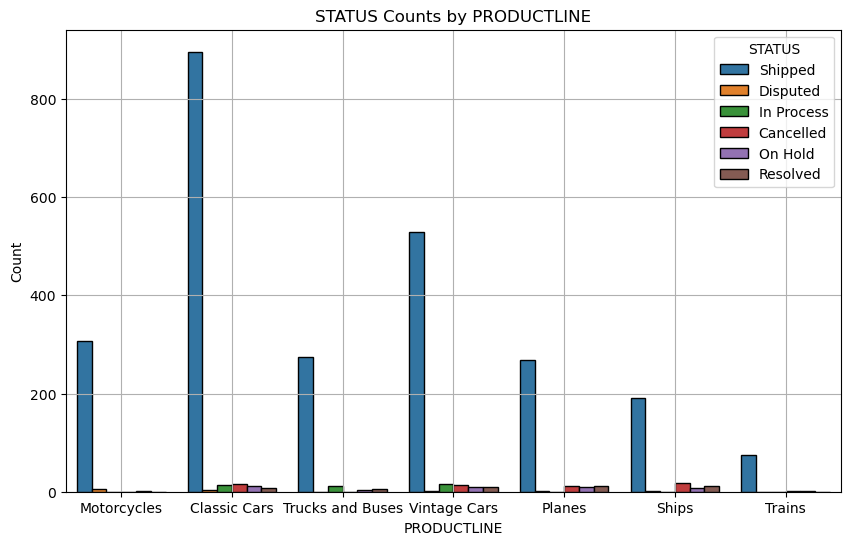

In [61]:
# Create a count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PRODUCTLINE', hue='STATUS', edgecolor='black')
plt.title('STATUS Counts by PRODUCTLINE')
plt.xlabel('PRODUCTLINE')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<Axes: xlabel='STATUS', ylabel='PRICEEACH'>

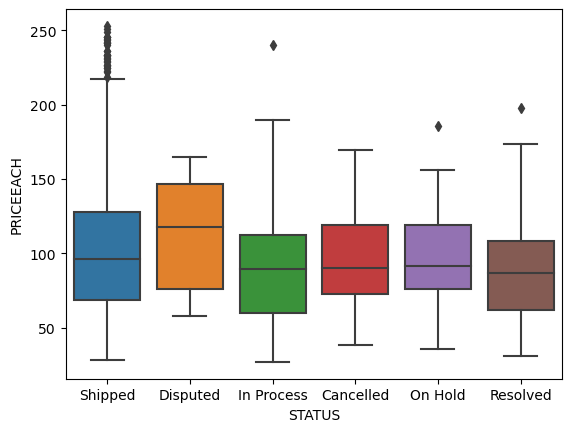

In [62]:
sns.boxplot(x=df['STATUS'],y=df['PRICEEACH'])

<Axes: xlabel='PRODUCTLINE', ylabel='MSRP'>

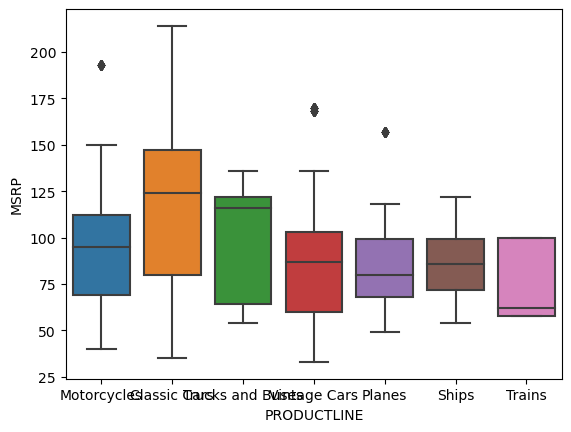

In [64]:
sns.boxplot(x=df['PRODUCTLINE'],y=df['MSRP'])

In [65]:
# IQR
Q1= df['SALES'].quantile(0.25)
Q3=df['SALES'].quantile(0.75)
IQR=Q3-Q1
IQR

2298.7449999999994

In [66]:
#Outlier
Outlier=df['SALES'][((df['SALES']<(Q1-1.5*IQR)))|(df['SALES']>(Q3+1.5*IQR))]
print(f'Outlier_Num:{Outlier}')

Outlier_Num:28      10993.50
30       8014.82
33       9064.89
39       8014.82
41      10172.70
          ...   
2171     8844.12
2225     8209.44
2358     8977.05
2432    10066.60
2559     9558.80
Name: SALES, Length: 79, dtype: float64
